In [2]:
import dbloader
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import ipywidgets as widgets
from IPython.display import display, clear_output
from functools import reduce

pokemon_df, trainers_df, trainers_cp_df = dbloader.read()

In [18]:
pokemon_df.head() # Pokemon head 

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power,pokemonID
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116,1875.60,0
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60,495.00,1
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93,2674.44,2
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82,2636.82,3
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64,1821.72,4


In [19]:
pokemon_df.describe() # Pokemon data description

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power,pokemonID
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546,1476.400578,14401.500000
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738,1474.132342,8315.142913
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.520000,0.000000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000,530.400000,7200.750000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000,1184.040000,14401.500000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000,1963.920000,21602.250000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000,10266.000000,28803.000000


In [20]:
pokemon_df["type1"].value_counts()

Water       5723
Normal      4368
Grass       2420
Bug         2292
Fighting    1945
Electric    1927
Poison      1658
Fire        1574
Rock        1350
Ground      1162
Psychic     1127
Dark         714
Dragon       581
Ghost        569
Steel        547
Ice          516
Fairy        328
Flying         3
Name: type1, dtype: int64

In [21]:
trainers_df.head() # Trainers head

,trainerID,trainername
0,0,A-list Actor Alonso
1,1,A-list Actor Ricardo
2,2,Ace Duo Elina & Sean
3,3,Ace Duo Jude & Rory
4,4,Ace Duo Jude & Rory


# Combat power histogram

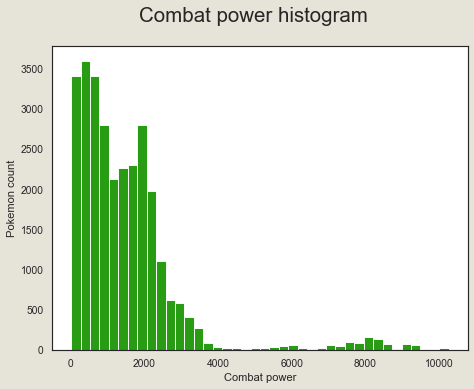

In [22]:
sns.set_style("white")
sns.set_context("notebook")

plt.figure(num=None, figsize=(8, 6), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat power histogram', fontsize=22)
plt.hist(pokemon_df['Combat Power'], bins=40, color="#289D13")
plt.xlabel("Combat power")
plt.ylabel("Pokemon count")
plt.show()

# Pokelevel histogram

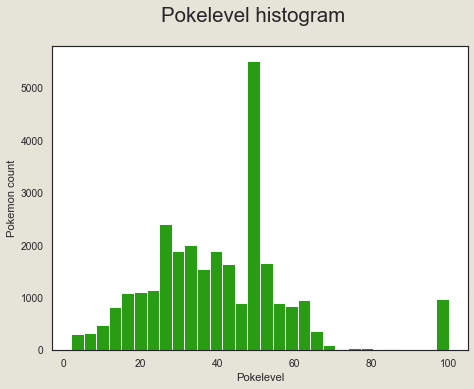

In [23]:
sns.set_style("white")
sns.set_context("notebook")

plt.figure(num=None, figsize=(8, 6), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Pokelevel histogram', fontsize=22)
plt.hist(pokemon_df['pokelevel'], bins=30, color="#289D13")
plt.xlabel("Pokelevel")
plt.ylabel("Pokemon count")
plt.show()

# Simple correlation matrix between statistics

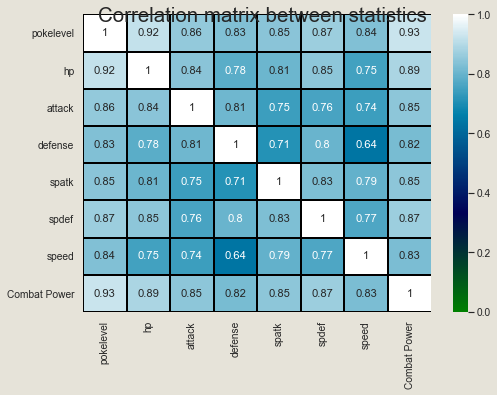

In [8]:
corr = pokemon_df[["pokelevel","hp","attack","defense","spatk","spdef","speed","Combat Power"]].corr()

plt.figure(num=None, figsize=(8, 6), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Correlation matrix between statistics', fontsize=22)
sns.heatmap(corr,cmap="ocean",vmax=1,vmin=0,annot=True,linewidths=1,linecolor="black")
plt.tight_layout()

# Simple widget exploring data

Dropdown(description='List', options=('Minimum', 'Maximum', 'Average', 'Mode', 'Standard deviation'), value='M…

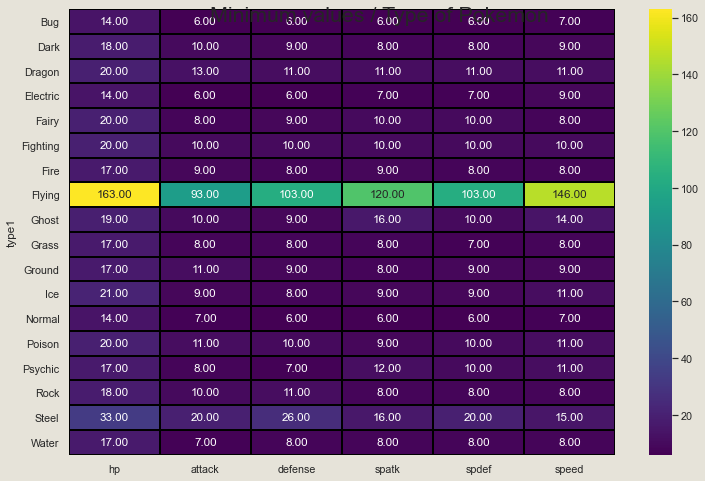

In [9]:
slowniczek = {
        "Minimum": pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").min(),
        "Maximum" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").max(),
        "Average" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean(),
        "Mode" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").median(),
        "Standard deviation" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").std()
        }
default = 'Minimum'

plt.figure(num=None, figsize=(11, 7), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{default} values / Type of Pokemon', fontsize=22)
sns.heatmap(data = slowniczek[default],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
plt.tight_layout()

w = widgets.Dropdown(
    options=slowniczek.keys(),
    value = default,
    description='List',
)
display(w)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        xxx = change['new']
        plt.figure(num=None, figsize=(11, 7), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{xxx} values / Type of Pokemon', fontsize=22)
        sns.heatmap(data = slowniczek[change['new']],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
        plt.tight_layout()

        
w.observe(on_change)

# Combat power variant 1

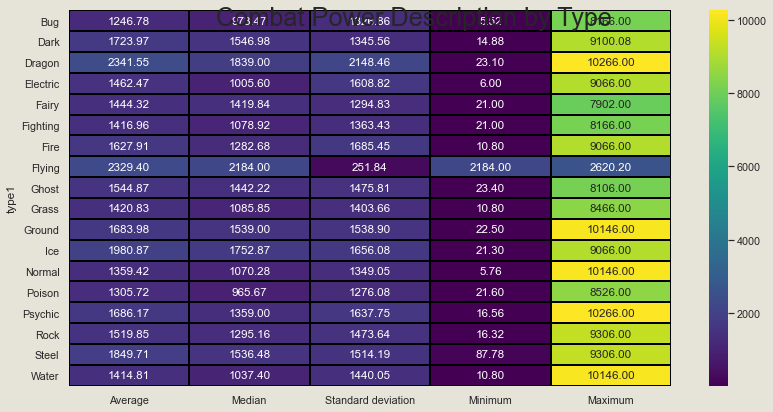

In [10]:
x = pokemon_df[["Combat Power","type1"]].groupby("type1").mean()
y = pokemon_df[["Combat Power","type1"]].groupby("type1").median()
z = pokemon_df[["Combat Power","type1"]].groupby("type1").std()
t = pokemon_df[["Combat Power","type1"]].groupby("type1").min()
u = pokemon_df[["Combat Power","type1"]].groupby("type1").max()
data_frames = [x,y,z,t,u]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['type1'],how='left'), data_frames)
df_merged.columns = ["Average","Median","Standard deviation","Minimum","Maximum"]

plt.figure(num=None, figsize=(12, 6), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat Power Description by Type', fontsize=26)
sns.heatmap(df_merged,annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
plt.tight_layout()

# Combat power variant 2

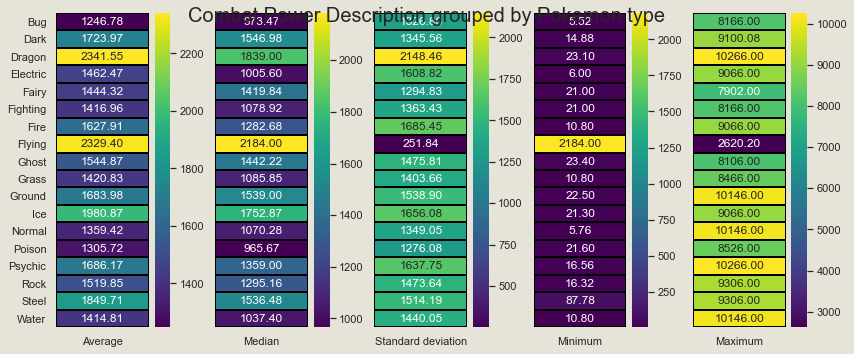

In [11]:
f, axs = plt.subplots(1, df_merged.columns.size, figsize=(12, 5,),facecolor="#E6E3D9")
for i, (s, a) in enumerate(zip(df_merged.columns, axs)):
    sns.heatmap(np.array([df_merged[s].values]).T, yticklabels=df_merged.index, xticklabels=[s], annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black", ax=a)
    if i>0:
        a.yaxis.set_ticks([])
f.suptitle("Combat Power Description grouped by Pokemon type",fontsize=20)
f.tight_layout()

# Sum of combat power per trainer

In [12]:
trainers_cp_df.head()

,trainerID,trainername,Combat Power Sum
0,0,A-list Actor Alonso,1875
1,1,A-list Actor Ricardo,495
2,2,Ace Duo Elina & Sean,5310
3,3,Ace Duo Jude & Rory,3645
4,4,Ace Duo Jude & Rory,5130


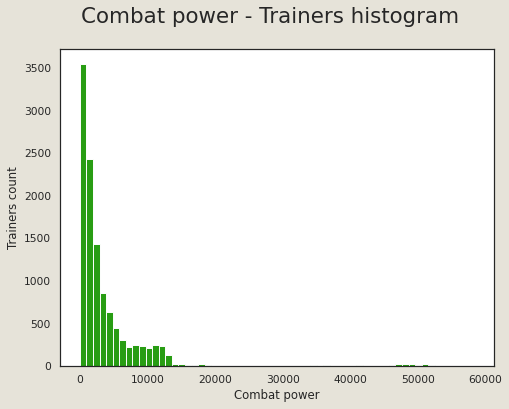

In [16]:
sns.set_style("white")
sns.set_context("notebook")

plt.figure(num=None, figsize=(8, 6), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat power - Trainers histogram', fontsize=22)
plt.hist(trainers_cp_df['Combat Power Sum'], bins=60, color="#289D13")
plt.xlabel("Combat power")
plt.ylabel("Trainers count")
plt.show()

In [ ]:
# What's the best pokemon?

In [17]:
pokemon_df.head()

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116,1875.60
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60,495.00
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93,2674.44
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82,2636.82
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64,1821.72


In [ ]:
pokemon_df.nlargest(5,columns="Combat Power")

In [ ]:
highest = 1.4
lowest = 0.51
cp_threshold = 9306.0 * lowest /highest
ligue = pokemon_df[pokemon_df["Combat Power"] > cp_threshold]
ligue

In [ ]:
fight_matrix = pd.DataFrame[]

In [ ]:
wins_list = []
draws_list = []
loses_list = []
for first_pokemon in ligue['Combat Power']:
    wins = 0
    draws = 0
    loses = 0
    for pokemon_versus in ligue['Combat Power']:
        

In [ ]:
xxx = pd.read_csv("Type matrix.csv")
xxx

In [ ]:
yyy = pokemon_df[(pokemon_df["pokelevel"] > 48) & (pokemon_df["pokelevel"] < 52) ]
yyy['type1'].value_counts()

# Figt mode section
 

In [20]:
league_df = pd.read_csv('league.csv')
league_6poks = league_df[league_df['trainerID'].map(league_df['trainerID'].value_counts()) == 6]
league_6poks

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,defense,spatk,Combat Power,pokemonID,trainername,Combat Power Sum
118,1274,0,Marowak,50,Ground,None,138,138,133,73,1854.0,2916,Cool♀,10659
119,1274,1,Chansey,50,Normal,None,328,328,28,58,1929.0,2917,Cool♀,10659
120,1274,2,Parasect,50,Bug,Grass,138,138,103,83,1794.0,2918,Cool♀,10659
121,1274,3,Nidorina,50,Poison,None,148,148,90,78,1674.0,2919,Cool♀,10659
122,1274,4,Nidorino,50,Poison,None,139,139,80,78,1674.0,2920,Cool♀,10659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,11859,1,Skiploom,50,Grass,Flying,133,133,73,68,1599.0,28799,Youthful Couple River,9819
7152,11859,2,Sealeo,50,Ice,Water,168,168,93,98,1809.0,28800,Youthful Couple River,9819
7153,11859,3,Lombre,50,Water,Grass,138,138,73,83,1599.0,28801,Youthful Couple River,9819
7154,11859,4,Poliwhirl,50,Water,None,143,143,88,73,1734.0,28802,Youthful Couple River,9819


In [21]:
league_6poks.describe()

,trainerID,place,pokelevel,hp,maxhp,defense,spatk,Combat Power,pokemonID,Combat Power Sum
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.00000,4278.000000,4278.000000,4278.000000
mean,6131.690042,2.500000,50.210846,147.162693,147.162693,94.783544,91.54418,1851.103815,15054.501403,11106.267882
std,3106.086209,1.708025,0.628565,27.133003,27.133003,29.996093,26.00763,285.043517,7704.732254,1484.036575
min,1274.000000,0.000000,47.000000,79.000000,79.000000,28.000000,33.00000,1040.580000,2916.000000,6240.000000
25%,3345.000000,1.000000,50.000000,133.000000,133.000000,73.000000,73.00000,1614.000000,8333.250000,9969.000000
50%,5944.000000,2.500000,50.000000,143.000000,143.000000,92.000000,88.00000,1884.000000,14672.500000,11365.000000
75%,8717.000000,4.000000,50.000000,158.000000,158.000000,108.000000,108.00000,2064.000000,21553.750000,12294.000000
max,11859.000000,5.000000,53.000000,352.000000,352.000000,257.000000,179.00000,2817.360000,28803.000000,13914.000000


In [18]:
league_6poks.to_csv()

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,defense,spatk,Combat Power,pokemonID,trainername,Combat Power Sum
118,1274,0,Marowak,50,Ground,None,138,138,133,73,1854.0,2916,Cool♀,10659
119,1274,1,Chansey,50,Normal,None,328,328,28,58,1929.0,2917,Cool♀,10659
120,1274,2,Parasect,50,Bug,Grass,138,138,103,83,1794.0,2918,Cool♀,10659
121,1274,3,Nidorina,50,Poison,None,148,148,90,78,1674.0,2919,Cool♀,10659
122,1274,4,Nidorino,50,Poison,None,139,139,80,78,1674.0,2920,Cool♀,10659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,11859,1,Skiploom,50,Grass,Flying,133,133,73,68,1599.0,28799,Youthful Couple River,9819
7152,11859,2,Sealeo,50,Ice,Water,168,168,93,98,1809.0,28800,Youthful Couple River,9819
7153,11859,3,Lombre,50,Water,Grass,138,138,73,83,1599.0,28801,Youthful Couple River,9819
7154,11859,4,Poliwhirl,50,Water,None,143,143,88,73,1734.0,28802,Youthful Couple River,9819
